<a href="https://colab.research.google.com/github/Celsius452/Biostats.Midterm/blob/main/Biostats_Midterm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset 1**

In [ ]:
install.packages('ggplot2')
install.packages('reshape2')
install.packages('png')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)
train <- read.csv("train.csv")

# **Part 1**

In [ ]:
#Dataset 1 Part 1
#function to draw the digit represented by each row
#input the train.csv data set and the row you want to draw
draw_digit<-function(data,row){
  #import the relevant libraries
  library(ggplot2)
  library(reshape2)
  
  #intialize the matrix with the first 28 pixels
  pixel_grid<-data[row,2:29]
  #rename the columns
  colnames(pixel_grid) <- paste("Col", 1:28)
  
  
  #put every 28 entries into a new row, starting at second row
  for(x in 1:27){
    #define first pixel in the row
    start<-x*28+2
    #define last pixel in the row
    end<-start+27
    #hold the data from those pixels temporarily
    temp_row<-data[row,start:end]
    #make the column names match the full matrix
    colnames(temp_row) <- paste("Col", 1:28)
    #add the temp row to the full matrix
    pixel_grid<-rbind(pixel_grid,temp_row)
  }
  #flip the matrix
  pixel_grid<-pixel_grid[nrow(pixel_grid):1,]
  #name the rows
  rownames(pixel_grid) <- paste("Row", 1:28)
  #melt the data so ggplot can interpret it
  #also transpose at this point
  m<-melt(as.matrix(t(pixel_grid)))
  #give column names to the melted data
  colnames(m) <- c("x", "y", "value")
  #define the theme for the heatmap - remove axis etc
  theme<-theme(legend.position="none",axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank(),axis.title.y=element_blank(),axis.text.y=element_blank(),axis.ticks.y=element_blank())
  #plot the data as a greyscale heatmap
  ggplot(m, aes(x=x,y=y,fill=value))+scale_fill_gradient(limits = c(0, 255), low = 'white', high = 'black')+geom_tile()+theme
}

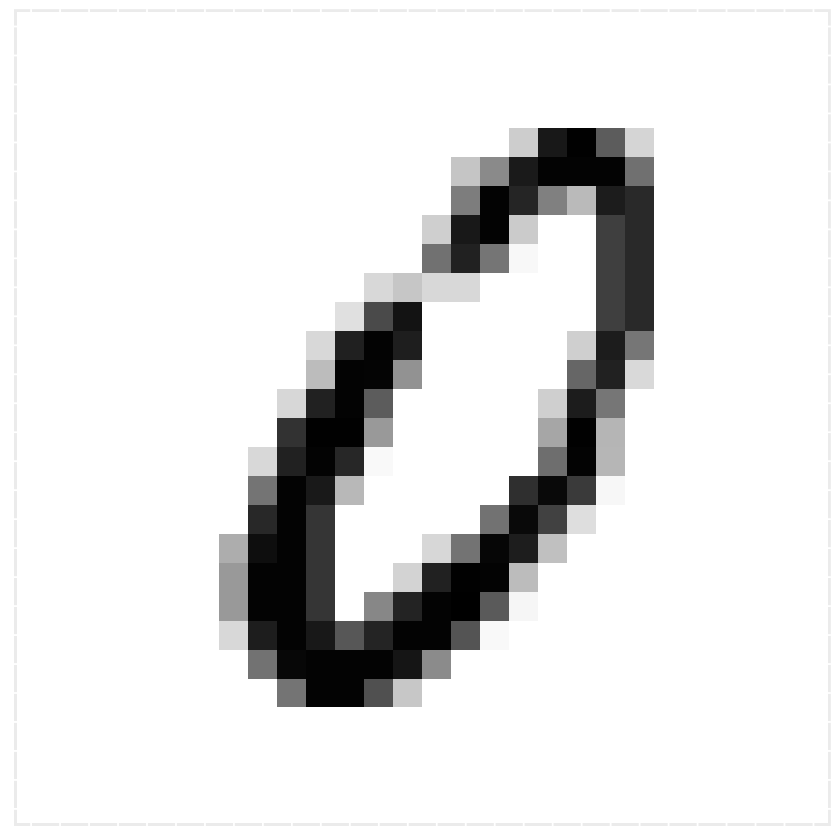

In [ ]:
#call the function on a row of your choice
draw_digit(train, 897)

# **Part 2**

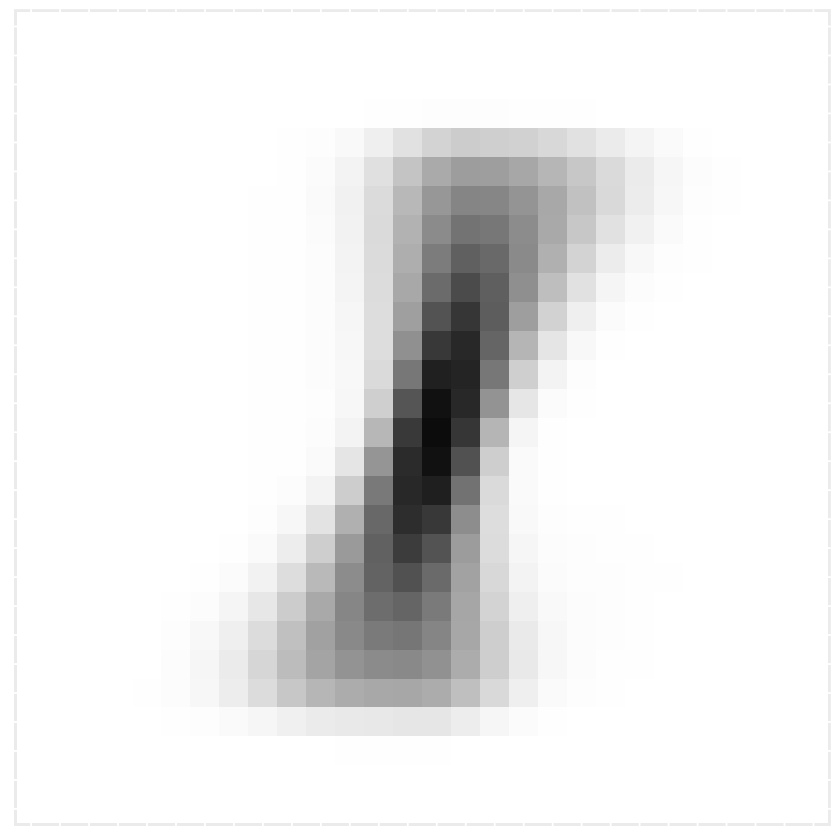

In [ ]:
#Dataset 1 Part 2
#create empty dataframe for the averages
digit_averages<-train[FALSE,]
#loop to get the averages for each digit 0-9
for(x in 0:9){
  #subset the data for the digit 
  digit_subset<- train[which(train[,1]==x),]
  #average the columns
  digit_subset<-colMeans(digit_subset)
  #add it to the dataset of averages
  digit_averages<-rbind(digit_averages,digit_subset)
}
#rename the columns to the digit they represent, otherwise the labels start at 1 instead of 0
row.names(digit_averages)<-0:9
#call the function on the average data for the digit of your choice
draw_digit(digit_averages,"1")

# **Part 2 b.**


# **Part 3 A**

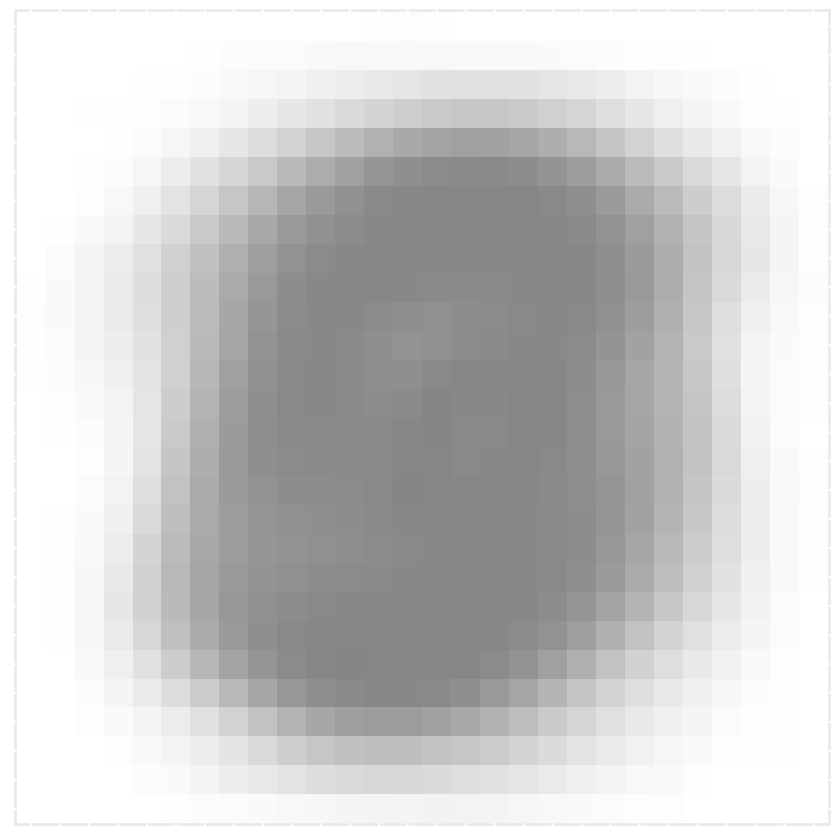

In [ ]:
#Dataset 1 Part 3

#create empty dataframe
col_vars<-train[FALSE,]
#calculate standard deviation of every row
train_var<-sapply(train, sd)
#add sd to dataframe
col_vars<-rbind(col_vars,train_var)
#rename columns
colnames(col_vars)<-colnames(train)
#visualize pixels with highest sd
draw_digit(col_vars,1)


In [ ]:
#sort the variances
sorted_var<- train_var[order(temp, decreasing = TRUE)]
#round the data
sorted_var<-round(sorted_var,2)
#view the top 50 pixels by highest variance
head(data.frame(sorted_var), 10)

,sorted_var
,<dbl>
pixel406,113.85
pixel378,113.71
pixel627,113.00
pixel461,112.92
pixel434,112.75
pixel433,112.75
pixel462,112.69
pixel437,112.58
pixel628,112.52


In [ ]:
#create empty dataframe for the variances
digit_variance<-train[FALSE,]
#loop to get the averages for each digit 0-9
for(x in 0:9){
  #subset the data for the digit 
  digit_subset<- train[which(train[,1]==x),]
  #average the columns
  digit_subset<-sapply(digit_subset, sd)
  #add it to the dataset of averages
  digit_variance<-rbind(digit_variance,digit_subset)
}
#rename the columns to the digit they represent, otherwise the labels start at 1 instead of 0
row.names(digit_variance)<-0:9

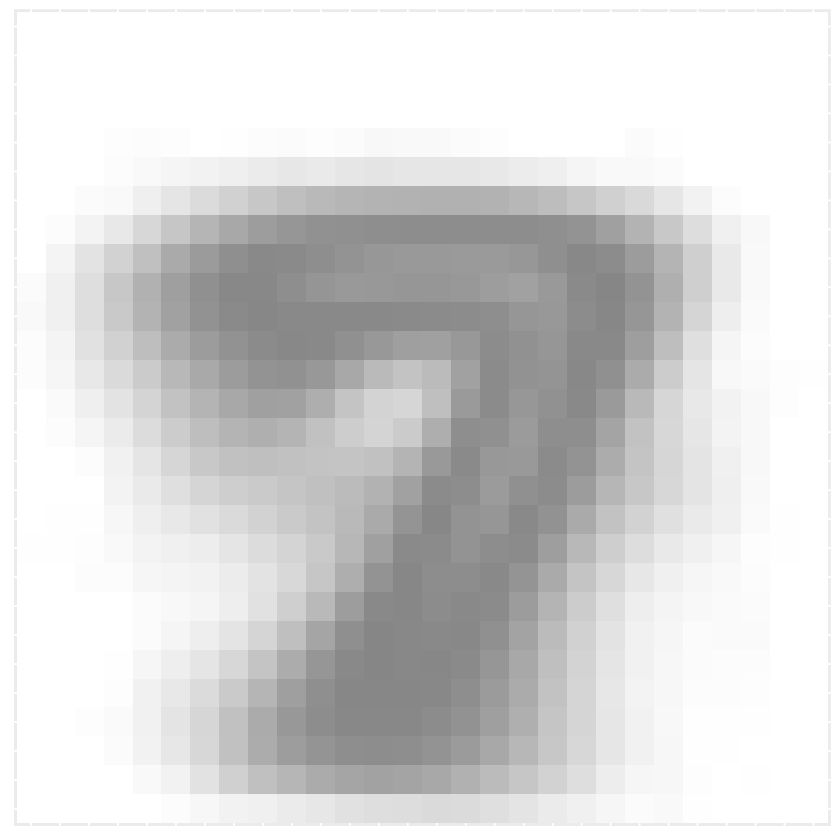

In [ ]:
draw_digit(digit_variance,"7")

# **Part 3 b.**


Part 3 c.

# **Part 3 d.**
The columns which have a very low average are ones that are not commonly written in for any digit. This comprises

In [ ]:
col_means<-colMeans(train)

4) Write the digits (0-9) in these squares and "digitize"
   them, essentially add lines corresponding to your own handwriting to this set
   You should present a program that prints out digits in your handwriting.

In [ ]:
#install relevant packages (if not done above) and declare functions

#install.packages('ggplot2')
#install.packages('reshape2')
#install.packages('png')
## average over a small square (fac x fac) 
ave_by_fac <- function(i1,fac,ii,jj){
  ave=0;
  cnt=0;
  for(i in c(1:fac)){
    for(j in c(1:fac)){
      cnt = cnt +1;
      x = (ii-1)*fac+i;
      y = (jj-1)*fac+j;
      ##	 	 cat("i,j,ii,jj,x,y=",i,j,ii,jj,x,y,"\n");
      ave = ave+	 i1[x,y];
    }}
  ave = ave/cnt;
  return(ave);
} 

## function I wrote to scale down a square image to a 28 x 28 image
## uses the averaging function above
scale_down_image <- function(img_in) {
  ## fac is the factor by which you have to scale the image to become a
  ## 28 x 28 square
  fac <- as.integer(dim(img_in)[1]/28); 
  im_out <- matrix(0,nrow=28,ncol=28);
  for(i in c(1:28)){
    for(j in c(1:28)){
      im_out[i,j] = ave_by_fac(img_in,fac,i,j);
    }}
  return(im_out);
} 

In [ ]:
#Get data
library(png)
library(vctrs)
library(ggplot2)
library(reshape2)


img<-readPNG("two_phone.png")


#function to take png image and convert it to same format as train.csv data
print_HW_digit<-function(img, label){
    
  #apply image scaling function
  img_scaled<-scale_down_image(img[,,2])
  
  #rescale values in the data to match given data, 0=white, 255=black
  img_scaled<-abs(img_scaled-1)
  img_scaled<-img_scaled-min(img_scaled)
  img_scaled<-img_scaled*255
  img_scaled<-round(img_scaled,0)
  #transpose data into correct orientation
  img_scaled<-t(img_scaled)
  
  #create the label as a dataframe
  label<-data.frame(label)
  
  #melt the image data so it is in long format
  img_m<-melt(img_scaled)
  #select only the values, excluding the x y coordinates
  img_m<-img_m$value
  #convert the linearized data into a data frame and transpose it so it is a row not a column
  img_lin<-data.frame(img_m)
  img_lin<-t(img_lin)
  #put the label in the first column
  img_lab<-cbind(label, img_lin)
  #label the columns and the row
  colnames(img_lab)<-colnames(train)
  rownames(img_lab)<-label
  #return the transformed data
  return(img_lab)
}


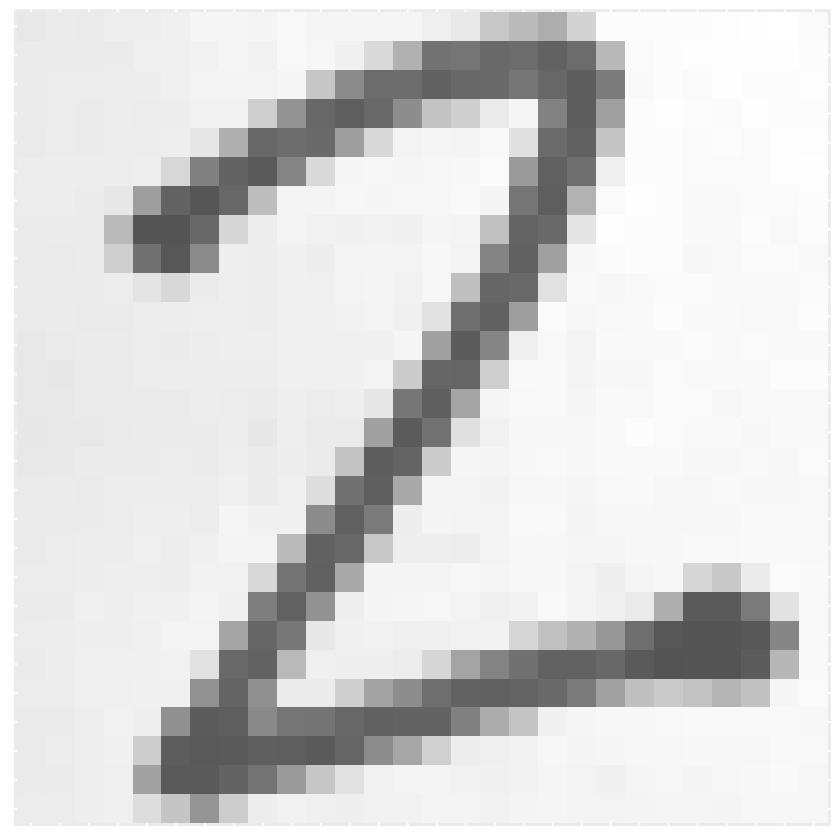

In [ ]:
#call the function and store the results
HW2<-print_HW_digit(img,"HW2")

#create a dataframe to hold each handwritten digit
HW_digits<-train[FALSE,]
#add the digit to the dataframe
HW_digits<-rbind(HW_digits,HW2[])

#call the function on the handwritten digit of your choice
draw_digit(HW_digits,1)

# **Dataset 2**

In [ ]:
#Install/Load libraries needed
install.packages("reshape2")
library("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Question 1

In [29]:
library("dplyr")
library("Hmisc")
library("reshape2")

#Read both files, set header to true
mcoldata<-read.csv("Mnemiopsis_col_data.csv",header=TRUE)
mcountdata<-read.csv("Mnemiopsis_count_data.csv",header=TRUE)


Attaching package: ‘dplyr’


The following object is masked from ‘package:vctrs’:

    data_frame


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: ignored

In [28]:
#make new column with mean expression for all experiments with a for loop
for(i in 1:nrow(mcountdata))
{
  mcountdata$expmean <- ((mcountdata$aboral1)+(mcountdata$aboral2)+(mcountdata$aboral3)+(mcountdata$aboral4)+(mcountdata$oral1)+(mcountdata$oral2)+(mcountdata$oral3)+(mcountdata$oral4))/(8)
}

ERROR: ignored

In [ ]:
#Sort the dataframe by expmean and check the top 5
sortedexpmean<-mcountdata[order(-mcountdata$expmean),]
head(sortedexpmean)

,Gene,aboral1,aboral2,aboral3,aboral4,oral1,oral2,oral3,oral4,expmean
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
12714,ML20395a,122707,131017,136282,111388,163380,101792,101421,109944,122241.38
14235,ML26358a,61229,93272,78693,78310,62893,46232,49534,47733,64737.00
16420,ML46651a,125638,105808,65907,93351,16236,10449,22838,58247,62309.25
2612,ML020045a,80445,48643,60380,45170,65580,54406,35861,48147,54829.00
30,ML00017a,52713,57824,59132,60254,59242,47001,48346,47841,54044.12
4249,ML04011a,49536,55951,56601,47869,64225,50041,44420,41929,51321.50


Q1. What are the top 5 genes with the highest average expression (across experiments) in the set? What is their function?

- The top 5 genes with the highest average expression across experiments are: ML20395a, ML26358a, ML46651a, ML020045a, and ML00017a.

- Their functions are:
- ML20395a: Elongation factor 1-alpha (translation)
- ML26358a: Actin (major protein constituent of cytoskeleton-->microfilaments, and for thin filaments in muscle fibrils)
- ML46651a: Membrane attack complex? (according to Argot2: no other results)
- ML020045a: Tubulin beta chain (second protein component of microtubule)
- ML00017a: Elongation factor 2 (translation)


Question 2

In [ ]:
#Create new variables that hold descending values for each column
sortedaboral1<-mcountdata[order(-mcountdata$aboral1),]
sortedaboral1
sortedaboral2<-mcountdata[order(-mcountdata$aboral2),]
sortedaboral2
sortedaboral3<-mcountdata[order(-mcountdata$aboral3),]
sortedaboral3
sortedaboral4<-mcountdata[order(-mcountdata$aboral4),]
sortedaboral4
sortedoral1<-mcountdata[order(-mcountdata$oral1),]
sortedoral1
sortedoral2<-mcountdata[order(-mcountdata$oral2),]
sortedoral2
sortedoral3<-mcountdata[order(-mcountdata$oral3),]
sortedoral3
sortedoral4<-mcountdata[order(-mcountdata$oral4),]
sortedoral4

Q2. Are the top 5 genes different if done on a per-column basis?

OG TOP 5 GENES ARE: ML20395a, ML26358a, ML46651a, ML020045a, and ML00017a


(S) = same; (D) = different
- When sorted on a per-column basis, the top 5 genes differ as follows:
- aboral1: ML46651a(S), ML20395a(S), ML020045a(S), ML174731a(D),ML26358a(S)
- aboral2: ML20395a(S),ML46651a(S),ML26358a(S),ML01482a(D),ML034334a(D)
- aboral3: ML20395a(S),ML01482a(D),ML26358a(S),ML46651a(S),ML034334a(D)
- aboral4: ML01482a(D),ML20395a(S),ML034334a(D),ML46651a(S),ML034336a(D)
- oral1: ML20395a(S),ML020045a(S),ML04011a(D),ML26358a(S),ML00017a(S)
- oral2: ML20395a(S),ML020045a(S),ML04011a(D),ML00017a(S),ML26358a(S)
- oral3: ML20395a(S),ML004510a(D),ML26358a(S),ML00017a(S),ML04011a(D)
- oral4: ML20395a(S),ML004510a(D),ML46651a(S),ML020045a(S),ML00017a(S)

-- Yes, the top 5 genes vary depending if it is done on a per-column basis. Many of the original top 5 genes reappear in these newly generated 
"top 5" gene sets, but each column has 1-3 different genes in its "top 5" listing. 

Question 3

In [ ]:
#Calculate mean and standard deviation for each column
#First for aboral1 column
aboral1vec<-mcountdata$aboral1
aboral1mean<-mean(aboral1vec)
aboral1sd<-sd(aboral1vec)

#Now repeat for the rest
aboral2vec<-mcountdata$aboral2
aboral2mean<-mean(aboral2vec)
aboral2sd<-sd(aboral2vec)
#aboral3
aboral3vec<-mcountdata$aboral3
aboral3mean<-mean(aboral3vec)
aboral3sd<-sd(aboral3vec)
#aboral4
aboral4vec<-mcountdata$aboral4
aboral4mean<-mean(aboral4vec)
aboral4sd<-sd(aboral4vec)
#oral1
oral1vec<-mcountdata$oral1
oral1mean<-mean(oral1vec)
oral1sd<-sd(oral1vec)
#oral2
oral2vec<-mcountdata$oral2
oral2mean<-mean(oral2vec)
oral2sd<-sd(oral2vec)
#oral3
oral3vec<-mcountdata$oral3
oral3mean<-mean(oral3vec)
oral3sd<-sd(oral3vec)
#oral4
oral4vec<-mcountdata$oral4
oral4mean<-mean(oral4vec)
oral4sd<-sd(oral4vec)


#Display mean for each column
aboral1mean
aboral2mean
aboral3mean
aboral4mean
oral1mean
oral2mean
oral3mean
oral4mean
aboral1sd
aboral2sd
aboral3sd
aboral4sd
oral1sd
oral2sd
oral3sd
oral4sd

In [ ]:

#now scale each column such that the mean is equal to the first column 

#Make a copy of this data frame to put scaled values in 
sc.mcountdata<-mcountdata

#Scale all values within each column by the conversion factor determined by the column means calculated earlier
sc.mcountdata$aboral2<-(sc.mcountdata$aboral1)*(524.1/580.5)
sc.mcountdata$aboral3<-(sc.mcountdata$aboral1)*(524.1/581.3)
sc.mcountdata$aboral4<-(sc.mcountdata$aboral1)*(524.1/560.1)
sc.mcountdata$oral1<-(sc.mcountdata$aboral1)*(524.1/551.6)
sc.mcountdata$oral2<-(sc.mcountdata$aboral1)*(524.1/429.0)
sc.mcountdata$oral3<-(sc.mcountdata$aboral1)*(524.1/419.6)
sc.mcountdata$oral4<-(sc.mcountdata$aboral1)*(524.1/457.4)
  
head(sc.mcountdata)


#IGNORE expmean column in sc.mcountdata data frame; just a holdover from copying the orignal data frame to be scaled

,Gene,aboral1,aboral2,aboral3,aboral4,oral1,oral2,oral3,oral4,expmean
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ML000110a,69,62.2961240,62.2103905,64.5650777,65.560007,84.295804,86.184223,79.061871,121.750
2,ML000111a,0,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.125
3,ML000112a,1,0.9028424,0.9015999,0.9357258,0.950145,1.221678,1.249047,1.145824,5.500
4,ML000113a,383,345.7886305,345.3127473,358.3829673,363.905547,467.902797,478.384890,438.850678,360.125
5,ML000114a,188,169.7343669,169.5007741,175.9164435,178.627266,229.675524,234.820782,215.414954,210.375
6,ML000115a,493,445.1012920,444.4887322,461.3128013,468.421501,602.287413,615.780029,564.891342,459.500


[1] 524.0979

[1] 580.5219

[1] 581.2736

[1] 560.0897

[1] 551.6403

[1] 428.9934

[1] 419.6067

[1] 457.4317

In [27]:
#Create a correlation matrix for the new data frame
#corr.sc.mcountdata<-cor(sc.mcountdata[2:9],sc.mcountdata[2:9])
#corr.sc.mcountdata
#right now just using the unscaled data
corr.mcountdata<-cor(mcountdata[2:9],mcountdata[2:9])
corr.mcountdata
#unscaled corr 
melt.corr.mcountdata<-melt(corr.mcountdata)
melt.corr.mcountdata
sorted.meltcorr<-melt.corr.mcountdata[order(-melt.corr.mcountdata$value),]
sorted.meltcorr
#remove every other line in the output of sorted.meltcorr to remove the duplicated comparison values. 
#We only really need half of the information because its redundant symmetrical around the self:self correlations

ERROR: ignored

In [ ]:
#remove every other line in the output of sorted.meltcorr to remove the duplicated comparison values. also remove the first 8 since they just correlate aboral/oral to itself
#We only really need half of the information because its redundant symmetrical around the self:self correlations
sorted.meltcorr2<-sorted.meltcorr[-c(1:8),]
sorted.meltcorr2 #all 1.00 values remove

#now remove duplicates be deleting every other entry
row_odd<-seq_len(nrow(sorted.meltcorr2))%%2
sorted.meltcorr2.ev<-sorted.meltcorr2[row_odd == 0,]
sorted.meltcorr2.ev


In [ ]:
install.packages('corrplot')
library(corrplot)
library(tidyverse)
install.packages('corrplot')
library(corrplot)
library(reshape)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ purrr   0.3.5
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tibble::data_frame() masks dplyr::data_frame(), vctrs::data_frame()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

#4) Use correlations between rows to find the closest pairs (top 5, most positively correlated)

correlation is which tissues have most similar expressions of a gene

   Are these close because they vary a lot between the groups or are they close because they don't vary much ?
correlation of gene expression values between tissue types. when gene expression values are positively correlated, the tissue types(groups), have little variation. correlation test is looking at how similar the gene expression values are between tissues. so when two different tissues are expressing the same gene, how similar are those expression levels.the groups are closely correlated because there is not much variation in expression level.

top 5 closest correlations



sorted.meltcorr shows correlations and their coefficients in order of most positively correlated to least correlated. there are no negatives.

get rid of the first 8 rows because they are just the same samples correlated with each other. this is redundant. 




The correlations of 1 redundant. they are the same tissue and same genes, so remove correlations of 1. 

In [ ]:
#pull top 5 highest correlation values
sorted.meltcorr2.ev[1:5,]


ERROR: ignored

In [ ]:
install.packages('lineup')
#lining up the expression data with the gene data.

library(lineup)


#findCommonID finds individuals that are in common between the two data sets
#returns an object containing indices for the two data sets to get them to line up (omits data that appears in one set but not the other)


id<-findCommonID(sorted.meltcorr_1, mcountdata)
#subset the rows in sorted.meltcorr_1 with the IDs in id, so the rows correspond to rows in mcountdata. this will pair the correlation values with the gene.
subcorr=c(sorted.meltcorr_1[id$first,], mcountdata[id$second,], what="paired")
lineup.subcorr=data.frame(subcorr)

#pull top 5 rows for top 5 correlation values and their gene IDs
lineup.subcorr[1:5,]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘qtl’




,Var1,Var2,colname,cor,Gene,aboral1,aboral2,aboral3,aboral4,oral1,oral2,oral3,oral4,expmean,what
,<fct>,<fct>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,aboral4,aboral2,value,0.9747975,ML000111a,0,0,0,0,0,1,0,0,0.125,paired
2,aboral2,aboral4,value,0.9747975,ML000112a,1,10,8,3,2,13,6,1,5.500,paired
3,aboral3,aboral2,value,0.9720700,ML000113a,383,546,402,471,290,190,282,317,360.125,paired
4,aboral2,aboral3,value,0.9720700,ML000114a,188,214,257,230,289,215,162,128,210.375,paired
5,oral2,oral1,value,0.9586231,ML000115a,493,455,540,501,413,403,419,452,459.500,paired


Top 5 highest correlation values with corresponding genes:
1 aboral4	aboral2	value	0.9747975	ML000111a	
2	aboral2	aboral4	value	0.9747975	ML000112a	
3	aboral3	aboral2	value	0.9720700	ML000113a	
4	aboral2	aboral3	value	0.9720700	ML000114a	
5	oral2	  oral1  	value	0.9586231	ML000115a


The top 5 highest correlation values are:
2 aboral4	aboral2	value	0.9747975
3	aboral2	aboral4	value	0.9747975
4	aboral3	aboral2	value	0.9720700
5	aboral2	aboral3	value	0.9720700
6	oral2	  oral1 	value	0.9586231

 4) Are these close because they vary a lot between the groups or are they close because they don't vary much ?

correlation of gene expression values between tissue types. when gene expression values are positively correlated, the tissue types, (groups), have little variation. correlation test is looking at how similar the gene expression values are between tissues. so when two different tissues are expressing the same gene, how similar are those expression levels.

the groups are closely correlated because there is not much variation in expression level.

Q1. What are the top 5 genes with the highest average expression (across experiments) in the set? What is their function?

- The top 5 genes with the highest average expression across experiments are as follows: ML20395a, ML26358a, ML46651a, ML020045a, and ML00017a.

- Their functions are as follows:
- ML20395a: Elongation factor 1-alpha (translation)
- ML26358a: Actin (major protein constituent of cytoskeleton->microfilaments; also for thin filaments in muscle fibrils)
- ML46651a: Membrane attack complex? (according to Argot2; no other results)
- ML020045a: Tubulin beta chain (second protein component of microtubule)
- ML00017a: Elongation factor 2 (translation)



Q2. Are the top 5 genes different if done on a per-column basis?

OG TOP 5 GENES ARE: ML20395a, ML26358a, ML46651a, ML020045a, and ML00017a


(S) = same; (D) = different
- When sorted on a per-column basis, the top 5 genes differ as follows:
- aboral1: ML46651a(S), ML20395a(S), ML020045a(S), ML174731a(D),ML26358a(S)
- aboral2: ML20395a(S),ML46651a(S),ML26358a(S),ML01482a(D),ML034334a(D)
- aboral3: ML20395a(S),ML01482a(D),ML26358a(S),ML46651a(S),ML034334a(D)
- aboral4: ML01482a(D),ML20395a(S),ML034334a(D),ML46651a(S),ML034336a(D)
- oral1: ML20395a(S),ML020045a(S),ML04011a(D),ML26358a(S),ML00017a(S)
- oral2: ML20395a(S),ML020045a(S),ML04011a(D),ML00017a(S),ML26358a(S)
- oral3: ML20395a(S),ML004510a(D),ML26358a(S),ML00017a(S),ML04011a(D)
- oral4: ML20395a(S),ML004510a(D),ML46651a(S),ML020045a(S),ML00017a(S)

-- Yes, the top 5 genes vary depending if it is done on a per-column basis. Many of the original top 5 genes reappear in these newly generated 
"top 5" gene sets, but each column has 1-3 different genes in its "top 5" listing. 

In [ ]:
```{r}
library(reshape2)
library(dplyr)
#unmelt the data and plot it
#cast.sorted.corr=dcast(sorted.meltcorr_1, X1 ~ X2)
corrplot(corr.mcountdata,# corrplot graphic without diagonal(eliminating corr=1)
         diag = FALSE)

ERROR: ignored

The correlogram represents the correlations for all pairs of variables. Positive correlations are displayed in blue and negative correlations in red,The intensity of the color is proportional to the correlation coefficient so the stronger the correlation.

the closer the correlation coefficient is to +1 or -1, the stronger the correlation
so find top 5 correlation coefficients that are closest to +1 or -1 (positively or negatively correlated). 
(top 5 most correlated data points)

all correlations are positive. 
correlations of 1 are excluded. 

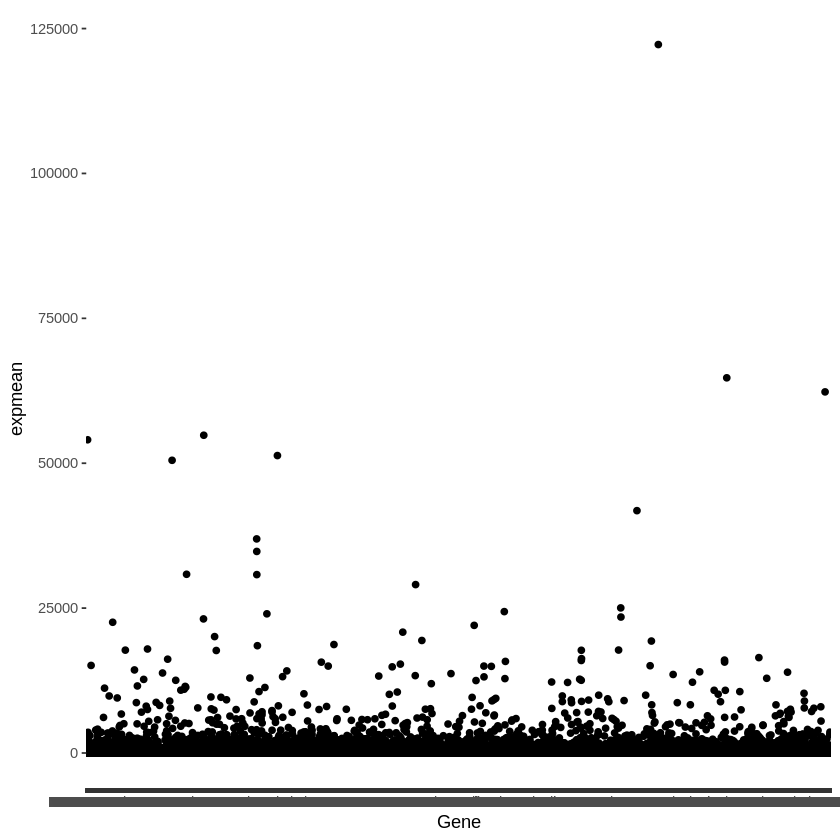

In [ ]:
##5) If you were forced to divide the genes in each column into high,
#medium and low count genes, how would you do this based on the data that you have?

#first plot the data to see the distribution of gene expression
library(ggplot2)
ggplot(mcountdata, aes(x=Gene,y= expmean)) +
  geom_point() 

In [ ]:
#6) make a list of the top 5 genes with most variability and top 5 genes with least variability (exclude genes that have low expression values)


#perform differential expression before filtering by variance so you are using normalized counts.
#must do between-sample normalization, which is needed to account for technical effects (differences not because of the biological conditions of interest) that prevent read count data from accurately reflecting differences in expression.
#for this we will do DESeq differential expression

#read in with no header
coldata<-read.csv("Mnemiopsis_col_data.csv")
countdata<-read.csv("Mnemiopsis_count_data.csv")



#be sure all colnames in count data are in col data
all(colnames(countdata))%in%rownames(coldata)

#make gene column in countdata into the rownames instead of it's own column
#do the same with the sample column in count data
library(tidyverse)
coldata <- data.frame(coldata, row.names = 1)#set the first column to the row names
countdata <- data.frame(countdata, row.names = 1)

#rename columns in count data to be the rownames in coldata
colnames(countdata)=rownames(coldata)

print(rownames(coldata))
print(colnames(countdata))
#the rownames in col data are the same as the colnames in countdata

#now make sure they are in the same order
all(colnames(countdata)==rownames(coldata))


library(DESeq2)
library(tidyverse)
library(airway)

#construct DESeq2 data set
dds<-DESeqDataSetFromMatrix(countData=countdata, 
                       colData = coldata, 
                       design = ~condition)

dds
#design is the factor in mcoldata that specifies the condition of the samples. as in if they are treated or untreated, ets. the name condition id from the last column in mcoldata


Warning message in all(colnames(countdata)):
“coercing argument of type 'character' to logical”


[1] FALSE

[1] "aboral-1" "aboral-2" "aboral-3" "aboral-4" "oral-1"   "oral-2"   "oral-3"  
[8] "oral-4"  
[1] "aboral-1" "aboral-2" "aboral-3" "aboral-4" "oral-1"   "oral-2"   "oral-3"  
[8] "oral-4"  


[1] TRUE

ERROR: ignored

In [ ]:
#set a factor level. compare between aboral and oral samples. we need to tell deseq to use one as a reference level so you can compare the two tissue types. here we will use aboral as the reference. 
dds$condition<- relevel(dds$condition, ref = "aboral")
#this would have been the case either way because it assigns a reference level alphabetically, but its nice to know how to do

ERROR: ignored

In [ ]:
#run DESeq
#save it back to the same object
dds<-DESeq(dds)
res<-results(dds)
res

ERROR: ignored

log2fold change column: positive values are up regulated genes, negative values are down regulated.


In [ ]:
summary(res)
#we can adjust the pvalue so as not to detect false potives
re0.01<-results(dds, alpha = 0.01)
summary(re0.01)

ERROR: ignored

summary shows how many genes are up and down regulated, how many are outliers, etc. 

In [ ]:
resultsNames(dds)

In [ ]:
#visualize data that is up and down regulated
plotMA(res)

this plot tells us the genes that are differentially expressed. significantly differentially expressed genes,(in blue) 
the blue has adjusted p value of less than 0.05.

the triangles indicate the genes have higher fold changes. direction of the triangles tells you the direction of the fold change. 

we want to see genes in the upper right or lower right quadrant because this means the genes have high means of normalized counts and high log fold changes. these are interesting genes to be looked in to. 


most of the data is between an expmean of 0 and 25000. therefore to divide the data into three groups, you must decide on a cutoff for low medium and high. the genes cannot be equally divided into three groups. 


In [ ]:
#variability, top 5 genes with the highest variability
sel_high = order(apply(re0.01, 1, var), decreasing=TRUE)[1:5]
sel_high

#top 5 genes with the lowest variability
sel_low = order(apply(re0.01, 1, var), decreasing=FALSE)[1:5]
sel_low

these numbers are the indicies to re0.01

In [ ]:
#print the indicies from re0.01 to get the genes with the top 5 highest and lowest variability

#highest variability indicies
print(re0.01[11025,])
print(re0.01[12343,])
print(re0.01[14204,])
print(re0.01[2298,])
print(re0.01[27,])


#lowest variability indices
print(re0.01[13108,])
print(re0.01[12839,])
print(re0.01[10103,])
print(re0.01[8197,])
print(re0.01[12160,])

highest variability genes from greatest variability to least: ML20395a, ML26358a, ML46651a, ML020045a, ML00017a

lowest variability genes from least variability to greatest: ML32095a, ML29351a, ML16594a, ML11345a, ML25222a